<a href="https://colab.research.google.com/github/btatsis/OSM/blob/master/REINVENT_AZ_OSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# uninstall torch v1.2.0 and other related modules
!pip uninstall torch torchvision torchsummary torchtext -y
# install conda
!wget https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
!chmod 770 ./Miniconda3-4.4.10-Linux-x86_64.sh
!time bash ./Miniconda3-4.4.10-Linux-x86_64.sh -b -f -p /usr/local
!export PYTHONPATH="/usr/local"
# install needed modules
!conda install -c pytorch -c defaults -c rdkit -y python=3.6 rdkit=2019.03.4 \
    pytorch=1.1 tqdm=4.19.4 joblib git gitpython=2.1.3
# git clone
!git clone https://github.com/yamasakih/reinvent.git

Uninstalling torch-1.3.0+cu100:
  Successfully uninstalled torch-1.3.0+cu100
Uninstalling torchvision-0.4.1+cu100:
  Successfully uninstalled torchvision-0.4.1+cu100
Uninstalling torchsummary-1.5.1:
  Successfully uninstalled torchsummary-1.5.1
Uninstalling torchtext-0.3.1:
  Successfully uninstalled torchtext-0.3.1
--2019-10-23 14:31:12--  https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58304693 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.4.10-Linux-x86_64.sh’

Miniconda3-4.4.10-L 100%[===================>]  55.60M  53.5MB/s    in 1.0s    

2019-10-23 14:31:14 (53.5 MB/s) - ‘Miniconda3-4.4.10-Linux-x86_64.sh’ saved [58304693/58304693]

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anacon

In [0]:
# check installed module versions
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
from rdkit import rdBase
print(rdBase.rdkitVersion)
import torch
print(torch.__version__)

2019.03.4
1.1.0


In [0]:
# change directory
import os
os.chdir('./reinvent')

In [0]:
# generate agent
!time python reinforce_model.py --scoring-function tanimoto --steps 500 \
  --query-smi 'N[C@@H](CC(=O)N1CCn2c(C1)nnc2C(F)(F)F)Cc3cc(F)c(F)cc3F' \
  --name 'sitagliptin' --resultdir 'result'

14:39:16: model.load_from_file +120: WARNING  Trying to load a model saved with version 0.1 on version 0.2. The model will be updated when saved
14:39:16: model.load_from_file +120: WARNING  Trying to load a model saved with version 0.1 on version 0.2. The model will be updated when saved
[14:39:17] SMILES Parse Error: unclosed ring for input: 'CN1CCCN(Cc2ccc(-c3ccc(-c4nc5cc(NC(=O)c7ccccc6N)ccc5[nH]4)ccc3Cl)cc2)CC1'
[14:39:17] Can't kekulize mol.  Unkekulized atoms: 15 16 18 19 20 21 22 23 24 25 26

[14:39:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 14 15 27 28 29 30

[14:39:17] Can't kekulize mol.  Unkekulized atoms: 4 5 6 15 27

[14:39:17] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 10 11 12 13 14

[14:39:17] SMILES Parse Error: unclosed ring for input: 'COCCOC(=O)CC1(CC2c3cccc4c3c(cn3C(C)(C)CC4=O)C3C(=O)OC(C)C23)OC(=O)C(C)(CC)CC(OCc2ccccc2)C1OCCCNCc1ccccc1'
[14:39:17] SMILES Parse Error: unclosed ring for input: 'COC(=O)CCCNC1Cc2cccc3c2C1Cc1cc(C(F)(F)F)ccc1N2'
[14:39:1

In [0]:
# generate 19 molecules
!python sample_from_model.py --save-smiles generated_smiles.smi --number 19 \
    --model result/Agent.ckpt

In [0]:
!cat generated_smiles.smi

NC(CC(=O)N1CCn2c(nnc2C(F)(Cl)Br)C1)Cc1cc(F)cc(F)c1
NC(CC(=O)N1CCn2c(nnc2C(Cl)(Cl)Cl)C1)Cc1cc(Cl)c(Br)cc1F
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(N(CCCl)CCCl)ccc1Cl
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(F)c(F)c(F)c1
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(Cl)c(Cl)cc1Cl
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1ccc(Br)cc1
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(Cl)ccc1Cl
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(Cl)cc(F)c1
NC(CC(=O)N1CCn2c(nnc2CCF)C1)Cc1cc(Br)cc(Br)c1
NC(CC(=O)N1CCn2c(nnc2C(Cl)(Br)Br)C1)Cc1ccc(Cl)c(F)c1
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(Cl)c(Cl)cc1Br
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(F)c(F)c(Br)c1
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(F)c(Cl)cc1F
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(Br)cc(F)c1Cl
NC(CC(=O)N1CCn2c(nnc2C(Br)(F)Cl)C1)Cc1cc(Br)c(F)cc1Cl
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Br)C1)Cc1cc(Br)cc(Br)c1
NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1Cl
NC(CC(=O)N1CCn2c(nnc2C(F)(F)Cl)C1)Cc1cc(Br)c(F)cc1Cl
NC(CC(=O)N1CCn2c(nnc2C(Cl)(Cl)Cl)C1)Cc1cc(Cl)c(Cl)cc1Cl


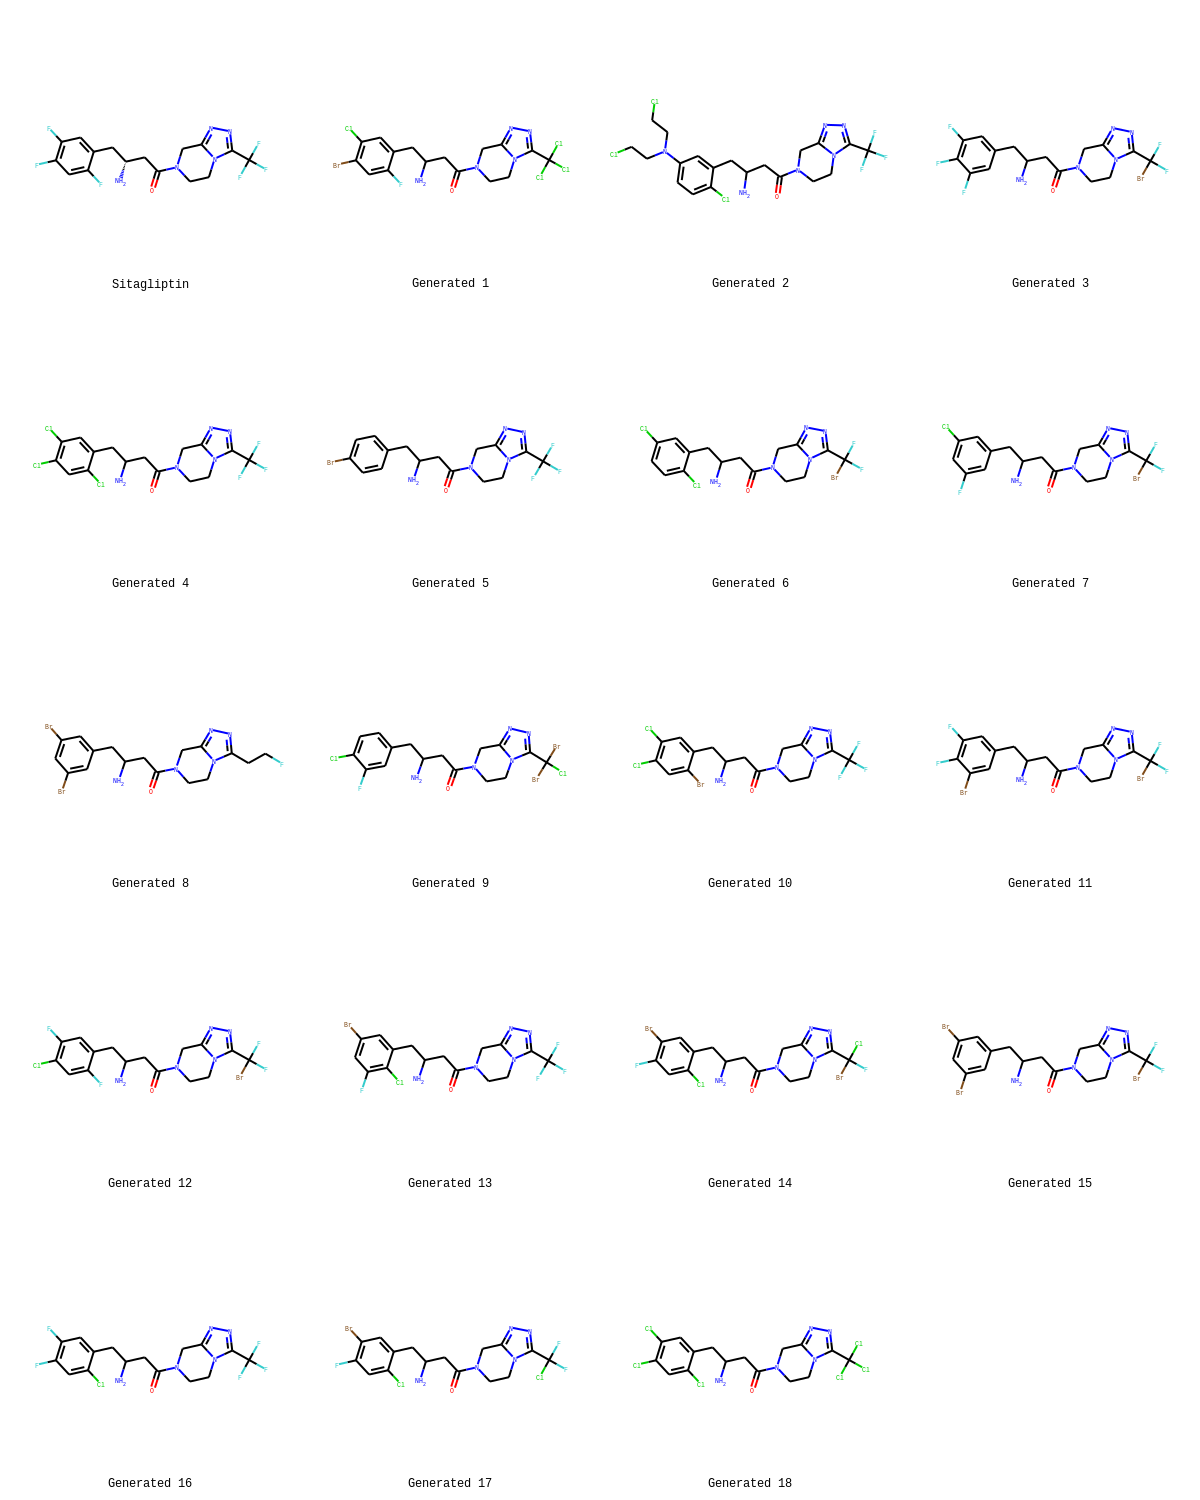

In [0]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
supp = Chem.SmilesMolSupplier('generated_smiles.smi')
_mols = [m for m in supp if m is not None]
sitagliptin = 'N[C@@H](CC(=O)N1CCn2c(C1)nnc2C(F)(F)F)Cc3cc(F)c(F)cc3F'
mols = [Chem.MolFromSmiles(sitagliptin)]
mols.extend(_mols)
legends = [f'Generated {i}' for i in range(len(mols))]
legends[0] = 'Sitagliptin'
Draw.MolsToGridImage(
    mols, legends=legends, molsPerRow=4, subImgSize=(300, 300))